In [1]:
import json
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

bidir_dag_lstm_validate accuracy: [0.0]


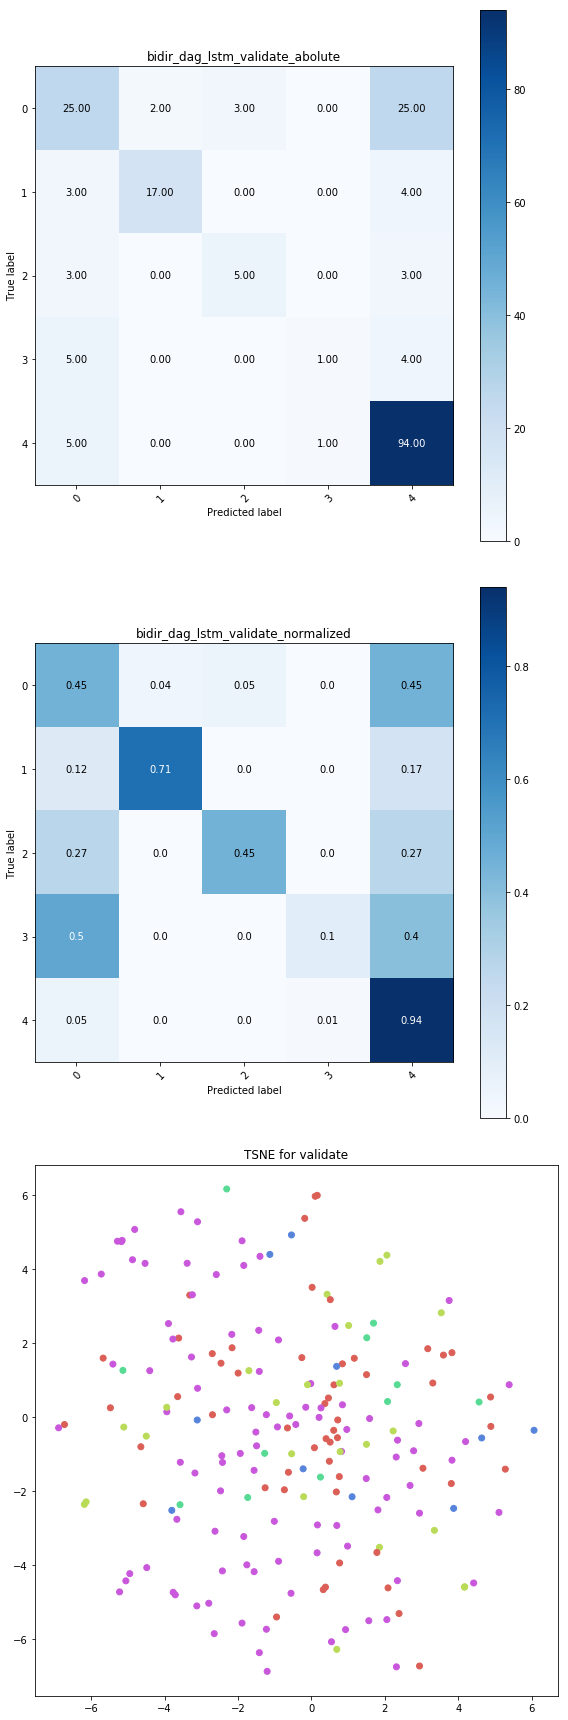

bidir_dag_lstm_test accuracy: [0.0]


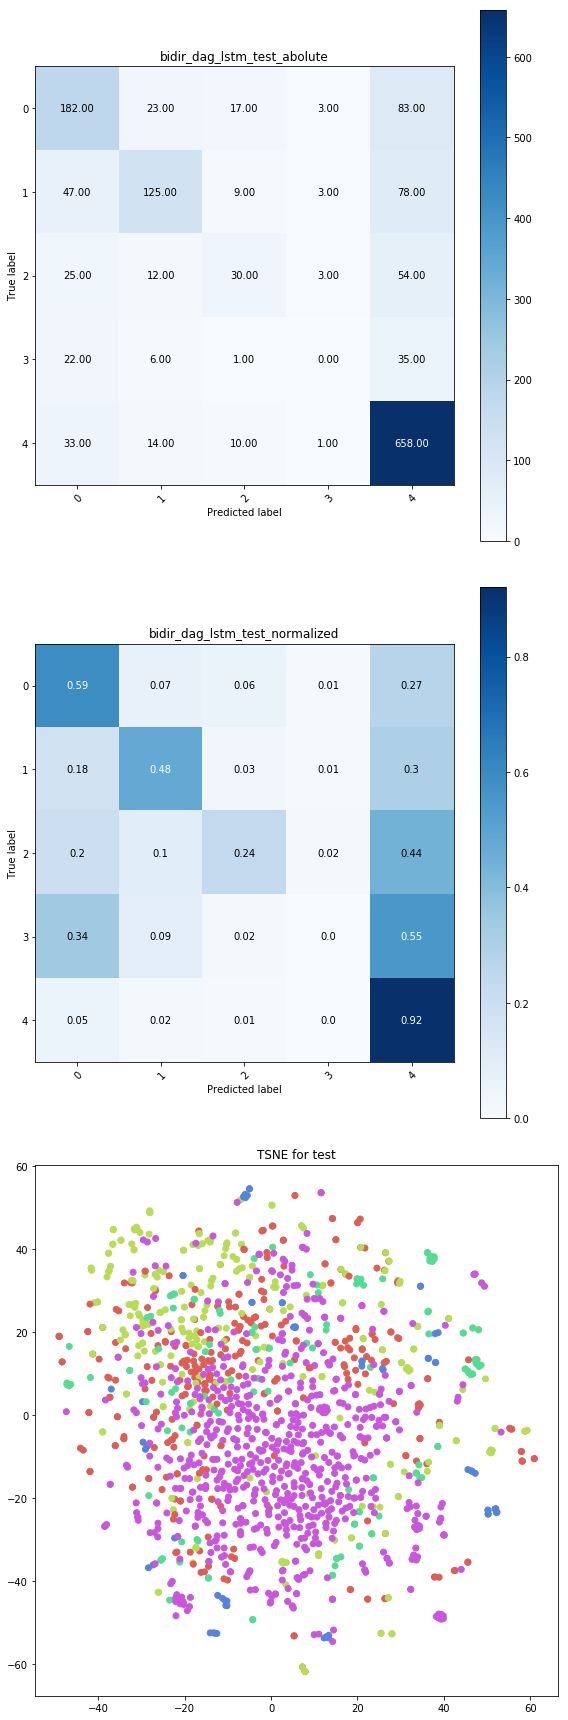

bidir_dag_lstm_train accuracy: [0.0]


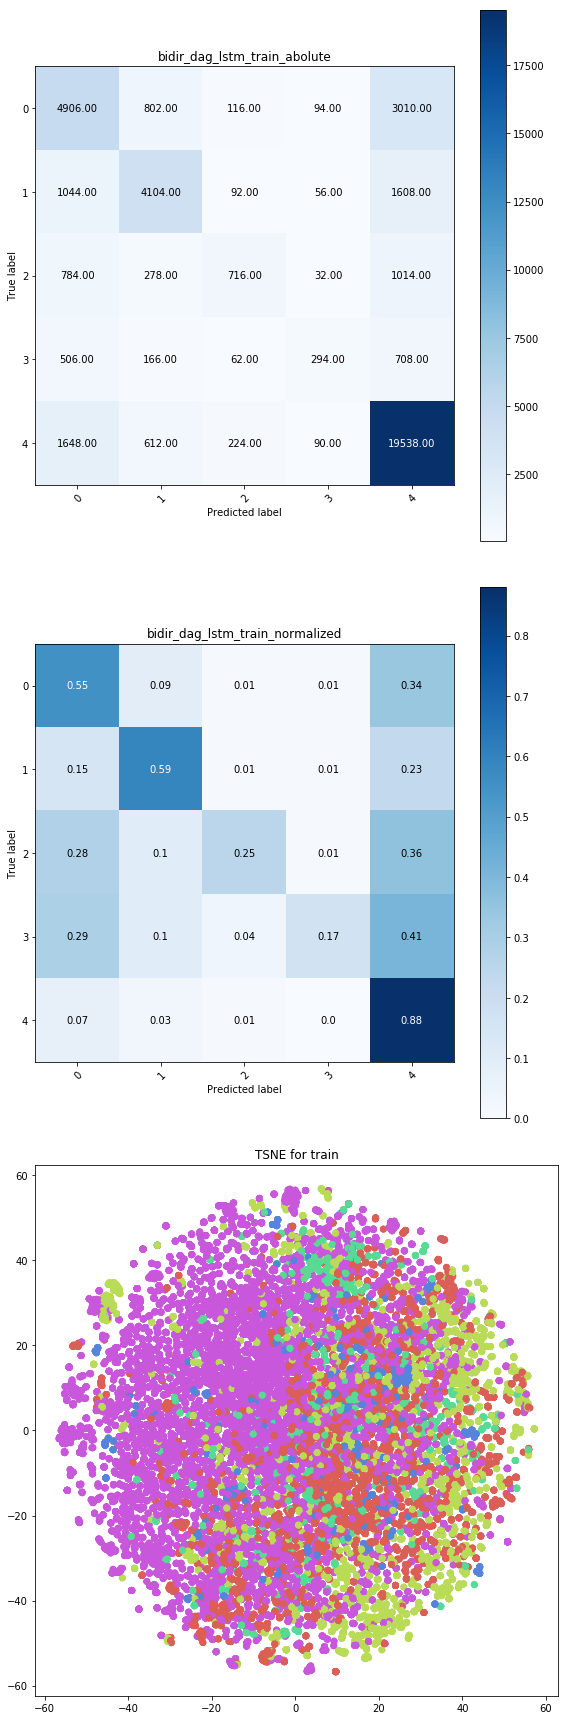

gs_lstm_validate accuracy: [0.0]


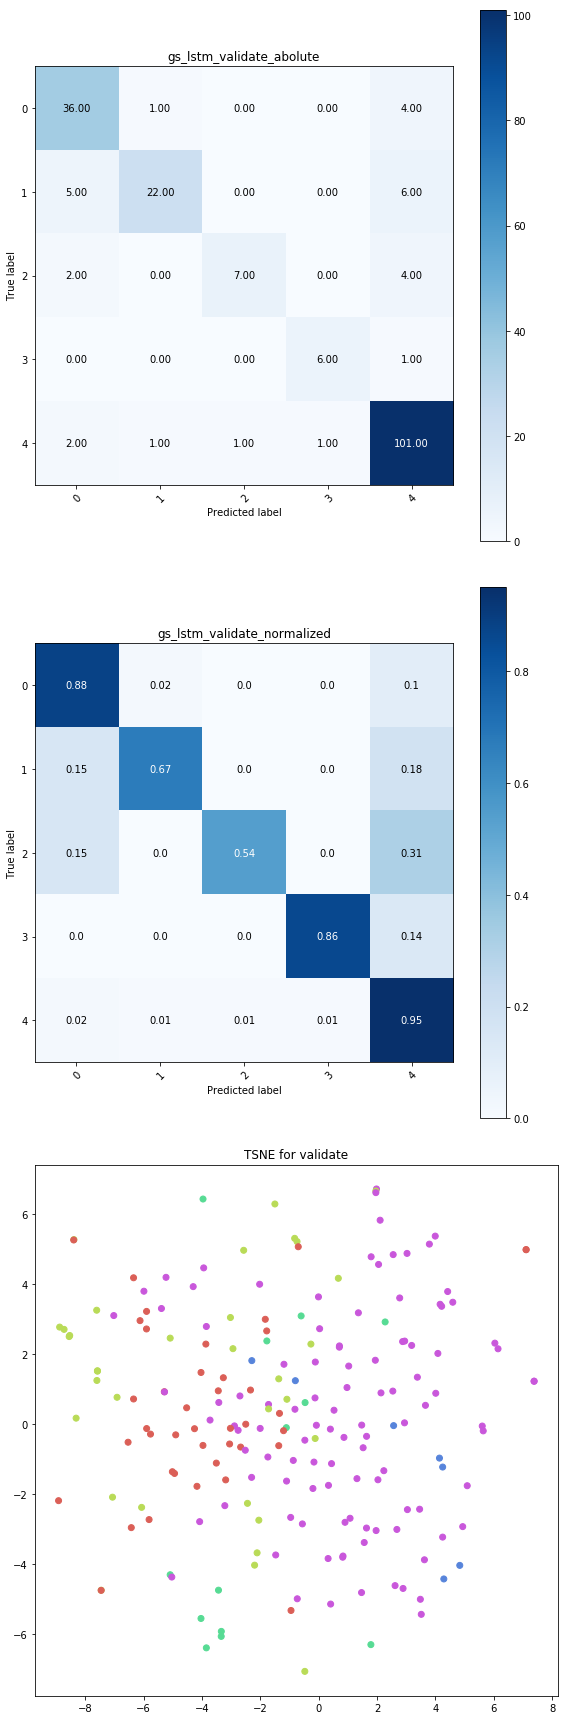

gs_lstm_test accuracy: [0.0]


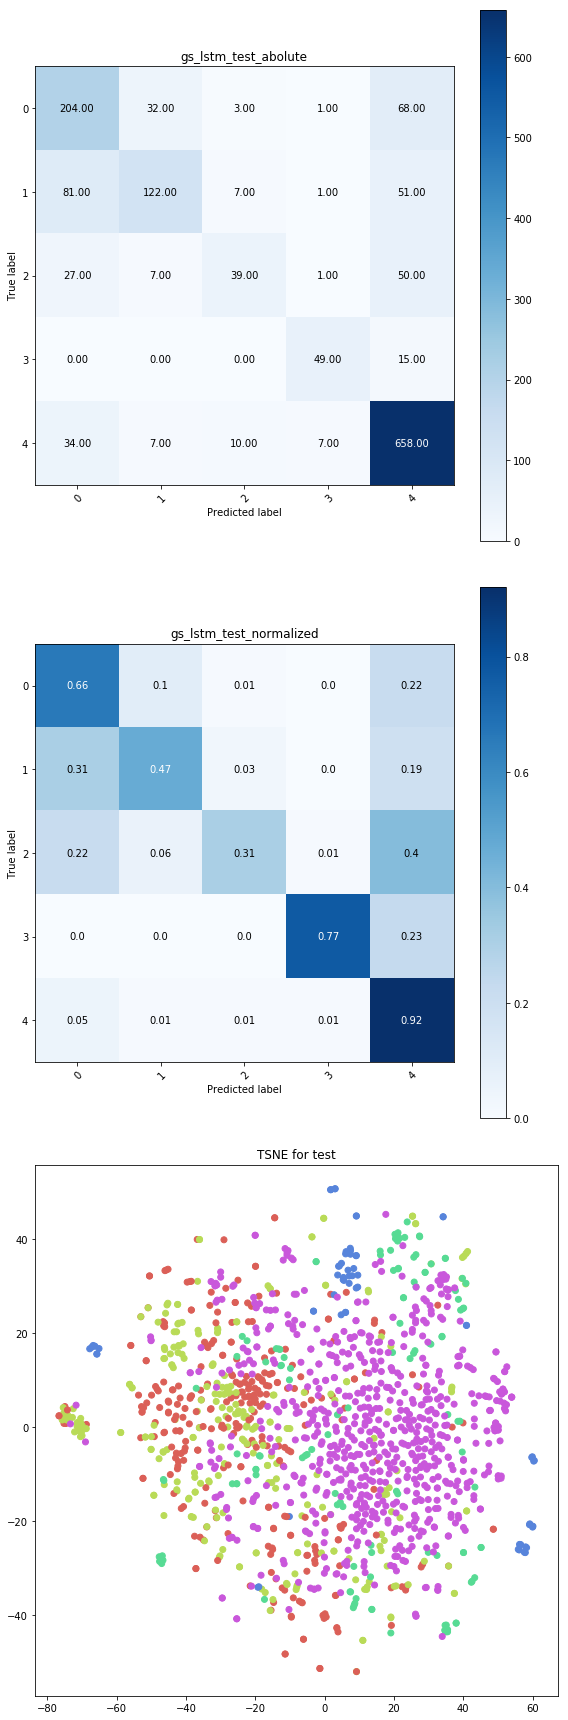

JSONDecodeError: Expecting value: line 1 column 1 (char 0)

In [3]:
model = ["bidir_dag_lstm", "gs_lstm"]
dataset = ["validate", "test", "train"]

for m in model:
    for d in dataset:
        data_path = "./" + m + "_result/" + d + "/result.json"

        with open(data_path) as f:
            json_file = json.load(f)

        confusion_matrix = np.asarray(json_file["confusion_matrix"])
        confusion_matrix_normalized = np.asarray(json_file["confusion_matrix_normalized"])
        accuracy = json_file["accuracy"]
        tsne = json_file["tsne"]
        answer = json_file["answer"]
        
        ##
        print(m + "_" + d, "accuracy:", accuracy)
        
        
        ## SET UP CONFUSION MATRRIX
        classes = [0, 1, 2, 3, 4, 5]
        cmap=plt.cm.Blues
        title_abs = m + "_" + d + "_abolute"
        title_norm = m + "_" + d + "_normalized"

        fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(8, 24))
        im1 = ax1.imshow(confusion_matrix, interpolation='nearest', cmap=cmap)
        ax1.figure.colorbar(im1, ax=ax1)
        # We want to show all ticks...
        ax1.set(xticks=np.arange(confusion_matrix.shape[1]),
               yticks=np.arange(confusion_matrix.shape[0]),
               xticklabels=classes, yticklabels=classes,
               title=title_abs,
               ylabel='True label',
               xlabel='Predicted label')

        # Rotate the tick labels and set their alignment.
        plt.setp(ax1.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

        # Loop over data dimensions and create text annotations.
        fmt = '.2f' 
        thresh = confusion_matrix.max() / 2.
        for i in range(confusion_matrix.shape[0]):
            for j in range(confusion_matrix.shape[1]):
                ax1.text(j, i, format(confusion_matrix[i, j], fmt), horizontalalignment="center", verticalalignment="center",
                        color="white" if confusion_matrix[i, j] > thresh else "black")

        im2 = ax2.imshow(confusion_matrix_normalized, interpolation='nearest', cmap=cmap)
        ax2.figure.colorbar(im2, ax=ax2)
        # We want to show all ticks...
        ax2.set(xticks=np.arange(confusion_matrix_normalized.shape[1]),
               yticks=np.arange(confusion_matrix_normalized.shape[0]),
               xticklabels=classes, yticklabels=classes,
               title=title_norm,
               ylabel='True label',
               xlabel='Predicted label')

        # Rotate the tick labels and set their alignment.
        plt.setp(ax2.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

        # Loop over data dimensions and create text annotations.
        # fmt = 'd'
        thresh = confusion_matrix_normalized.max() / 2.
        for i in range(confusion_matrix_normalized.shape[0]):
            for j in range(confusion_matrix_normalized.shape[1]):
                ax2.text(j, i, confusion_matrix_normalized[i, j], horizontalalignment="center", verticalalignment="center",
                color="white" if confusion_matrix_normalized[i, j] > thresh else "black")
        
        palette = np.array(sns.color_palette("hls", 5))
        ax3.scatter([t[0] for t in tsne], [t[1] for t in tsne], c=palette[np.asarray(answer)])
        ax3.set_title('TSNE for ' + d)
        
        fig.tight_layout()
        plt.show()        